# 4.10 Coding Etiquette & Excel Reporting Part 3

### This script contains the following:
1. Importing libraries
2. Importing data
3. Comparing customer profiles across regions and grocery departments and exploring relationships
4. Extra visuals, including customer loyalty as well as price and frequency of different customer profiles

### 1. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Get imports and everything set up to work offline for maps.

import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
# Importing Plotly for the option to create interactive visuals.

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# The line above allows us to use plotly offline (not on their website), so we can use it for visualizations in Python.

print(__version__) # requires version >= 1.9.0

5.9.0


In [4]:
# Importing cufflinks to work with Plotly to call plots directly off of a Pandas dataframe.

import cufflinks as cf

In [5]:
# For Notebooks

init_notebook_mode(connected=True)    # Allows us to see everything we plot inside the Jupyter notebook.

In [6]:
# For offline use.
cf.go_offline() 

### 2. Importing Data

In [7]:
# Creating a path for data import.

path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 4 - Python\01-2023 Instacart Basket Analysis'
print(path)

C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 4 - Python\01-2023 Instacart Basket Analysis


In [8]:
# Importing latest merged file with normal customer activity for orders, products, and customers data from 4.10 part 2.

df_norm_act = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_profiles.pkl'))

In [9]:
# Importing the merged file with indepedent adults only.

df_ind_adults = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_all_indep_adults.pkl'))

In [10]:
# Importing departments dataframe.

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [11]:
df_norm_act.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages


In [12]:
df_norm_act.shape

(30964564, 36)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df_ind_adults.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group,family_size
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household


In [15]:
df_ind_adults.shape

(29483392, 36)

In [16]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
# Rename unnamed column to department_id. 

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [18]:
df_dep.shape

(21, 2)

### 3. Comparing Customer Profiles Across Regions & Departments

#### This section includes both comparisons and visuals, or numbers 8 and 9 of part 1 of task 4.10.

#### a) Income Levels

In [29]:
# Compare your customer profiles with regions and departments. Can you identify a link between them? 
# Customers may demonstrate different behaviors across regions, which could make this information important.

# Compare age_group across regions
income_region_crosstab = pd.crosstab(df_norm_act['region'], df_norm_act['income_level'], dropna = False)
income_region_crosstab

income_level,high-income,low-income,middle-income
region,,,
Midwest,1841900,1790670,3628943
Northeast,1372838,1367074,2724773
South,2549267,2593563,5168309
West,1977256,1990041,3959930


Text(0.5, 0, 'Regions')

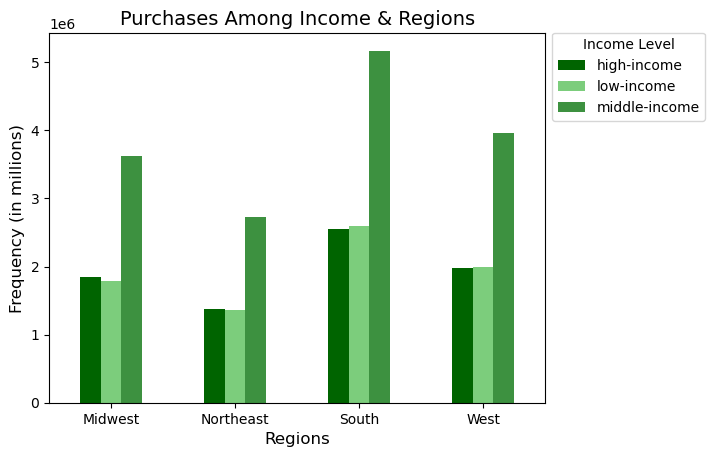

In [69]:
# Create a stacked bar chart for income_level and region.
bar_income_region = income_region_crosstab.plot(kind = 'bar', rot = 0, color = ['darkgreen', '#7CCD7C', '#3D9140'])
bar_income_region.legend(title = 'Income Level', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Purchases Among Income & Regions', fontsize = 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions', fontsize = 12)

#### As you can see from above, middle income customers bought more items, while low and high income customers bought about the same amount of items from Instacart. This means middle-income customers likely hold a greater share of Instacart's market than low or high income earners.

In [111]:
# Export bar income_region bar chart.

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'), bbox_inches='tight')

In [18]:
# Comparing income and departments.

# Compare income across departments.
income_department_crosstab = pd.crosstab(df_norm_act['department'], df_norm_act['income_level'], dropna = False)
income_department_crosstab

income_level,high-income,low-income,middle-income
department,,,
alcohol,40862,36825,66940
babies,105674,83835,220883
bakery,290424,264827,565577
beverages,618533,743205,1210163
breakfast,162888,187562,320400
bulk,7541,9400,16510
canned goods,265864,222477,523733
dairy eggs,1314036,1229252,2633894
deli,251018,248154,504662


In [19]:
df_norm_act.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,beverages


In [20]:
df_norm_act.shape

(30964564, 36)

Text(0.5, 23.52222222222222, 'Income Levels')

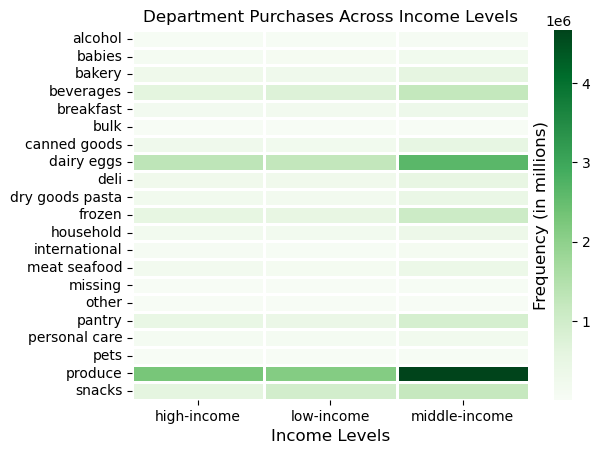

In [21]:
# Creating a heatmap to show relationship between income levels and department purchases.

heatmap_income_dept = sns.heatmap(income_department_crosstab, cmap='Greens',linecolor='white',linewidths=1)

plt.title('Department Purchases Across Income Levels', fontsize = 12)
heatmap_income_dept.yaxis.set_label_position("right")
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Levels', fontsize = 12)

In [22]:
# Export heatmap department/income_level chart.

heatmap_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_income_dept.png'), bbox_inches='tight')

#### b) Age Groups

In [71]:
# Compare your customer profiles with regions and departments. Can you identify a link between them? 
# Customers may demonstrate different behaviors across regions, which could make this information important.

# Compare age_group across regions
age_region_crosstab = pd.crosstab(df_norm_act['region'], df_norm_act['age_group'], dropna = False)
age_region_crosstab

age_group,middle-aged,older adult,oldest old,young adult
region,,,,
Midwest,2323069,1661003,794440,2483001
Northeast,1708719,1269255,614974,1871737
South,3181471,2387045,1134376,3608247
West,2511691,1844572,868839,2702125


Text(0.5, 0, 'Regions')

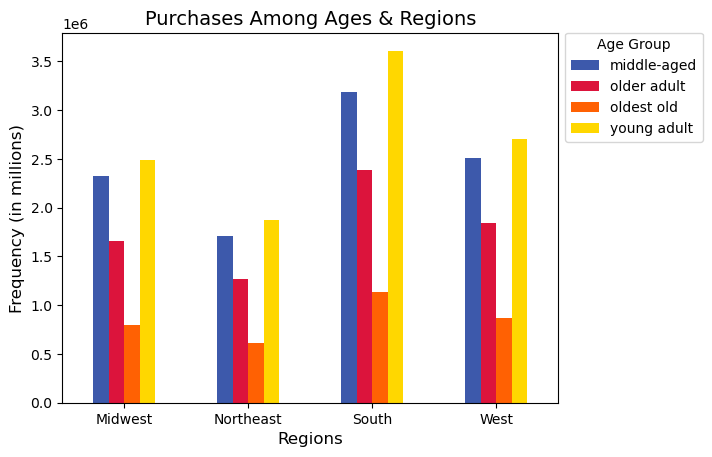

In [74]:
# Create a stacked bar chart for age_group and region.
bar_age_region = age_region_crosstab.plot(kind = 'bar', rot = 0, color = ['#3D59AB', '#DC143C', '#FF6103', '#FFD700'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Purchases Among Ages & Regions', fontsize = 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions', fontsize = 12)

In [109]:
# Export bar age_region bar chart.

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'), bbox_inches='tight')

In [19]:
# Compare puchases by different age groups across departments.

age_department_crosstab = pd.crosstab(df_norm_act['department'], df_norm_act['age_group'], dropna = False)
age_department_crosstab

age_group,middle-aged,older adult,oldest old,young adult
department,,,,
alcohol,45375,32565,15031,51656
babies,130198,94192,44546,141456
bakery,352380,258124,124322,386002
beverages,814059,598545,285124,874173
breakfast,211160,153810,73941,231939
bulk,10403,7690,3734,11624
canned goods,317911,234096,110351,349716
dairy eggs,1621367,1194908,567604,1793303
deli,314654,232690,110645,345845


Text(0.5, 23.52222222222222, 'Age Groups')

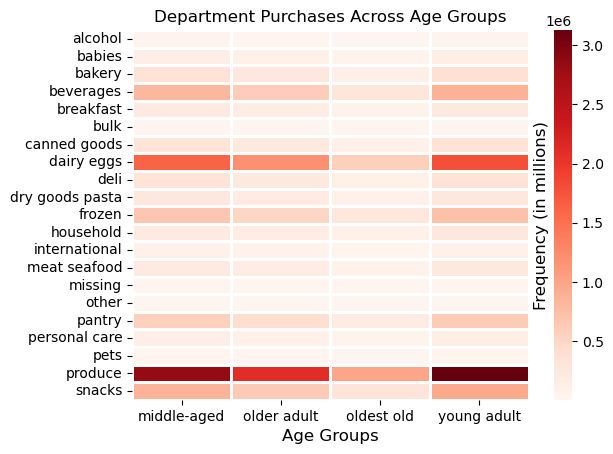

In [20]:
# Creating a heatmap to show relationship between age groups and department purchases.

heatmap_age_dept = sns.heatmap(age_department_crosstab, cmap='Reds',linecolor='white',linewidths=1)

plt.title('Department Purchases Across Age Groups', fontsize = 12)
heatmap_age_dept.yaxis.set_label_position("right")
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Groups', fontsize = 12)

In [21]:
# Export heatmap department/ages chart.

heatmap_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_age_dept.png'), bbox_inches='tight')

#### c) Number of Dependents

In [23]:
# Compare your customer profiles with regions and departments. Can you identify a link between them? 
# Customers may demonstrate different behaviors across regions, which could make this information important.

# Compare purchases among diffent sizes of families among regions.

family_region_crosstab = pd.crosstab(df_ind_adults['region'], df_ind_adults['family_size'], dropna = False)
family_region_crosstab

family_size,childless household,large household,medium household
region,,,
Midwest,1822816,1671542,3415720
Northeast,1354482,1291928,2561845
South,2581933,2425559,4798190
West,1980450,1895018,3683909


Text(0.5, 0, 'Regions')

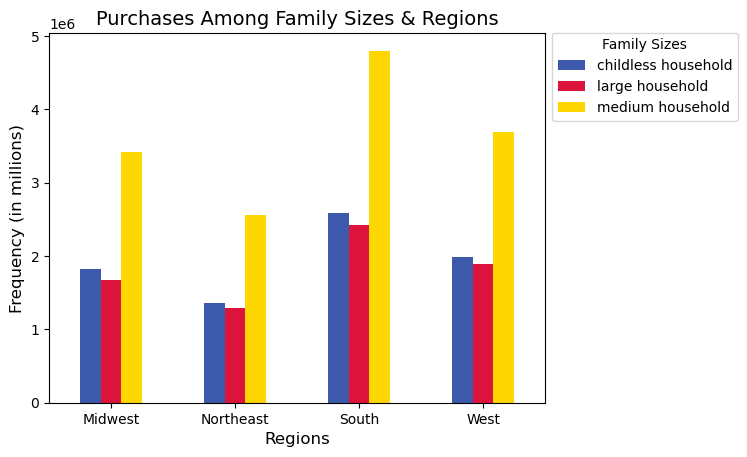

In [24]:
# Create a stacked bar chart for family size and region.
bar_family_region = family_region_crosstab.plot(kind = 'bar', rot = 0, color = ['#3D59AB', '#DC143C', '#FFD700'])
bar_family_region.legend(title = 'Family Sizes', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Purchases Among Family Sizes & Regions', fontsize = 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions', fontsize = 12)

In [25]:
# Export bar family_region bar chart.

bar_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_region.png'), bbox_inches='tight')


In [19]:
# Create a data dictionary for departments for the df_ind_adults dataframe. This is so we can eventually add the 
# column "departments" to the df_ind_adults dataframe, the one with only those with dependents and not living at home
# with their parents.

dep_dict = dict(zip(df_dep['department_id'], df_dep['department']))

In [20]:
dep_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [21]:
# Create a new column to get department name into the main dataframe.

df_ind_adults['department'] = df_ind_adults['department_id'].map(dep_dict)

In [22]:
df_ind_adults['department'].value_counts(dropna = False)

produce            8648734
dairy eggs         4926975
snacks             2635096
beverages          2452794
frozen             2018738
pantry             1696860
bakery             1067144
canned goods        963597
deli                955715
dry goods pasta     782594
household           666508
meat seafood        642437
breakfast           637652
personal care       404105
babies              391011
international       243597
alcohol             136248
pets                 87722
missing              61451
other                32596
bulk                 31818
Name: department, dtype: int64

In [22]:
# Compare puchases by families of different sizes across departments.

family_department_crosstab = pd.crosstab(df_ind_adults['department'], df_ind_adults['family_size'], dropna = False)
family_department_crosstab

family_size,childless household,large household,medium household
department,,,
alcohol,36827,34428,64993
babies,103328,96971,190712
bakery,281395,262021,523728
beverages,645341,602237,1205216
breakfast,166432,156765,314455
bulk,8000,7734,16084
canned goods,251020,238959,473618
dairy eggs,1294376,1212538,2420061
deli,253382,236512,465821


In [23]:
df_ind_adults.shape

(29483392, 37)

In [26]:
pd.options.display.max_columns = None

In [27]:
df_ind_adults.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income,region,exclusion_flag,income_level,age_group,family_size
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity,low-income,young adult,large household


Text(0.5, 23.52222222222222, 'Family Sizes')

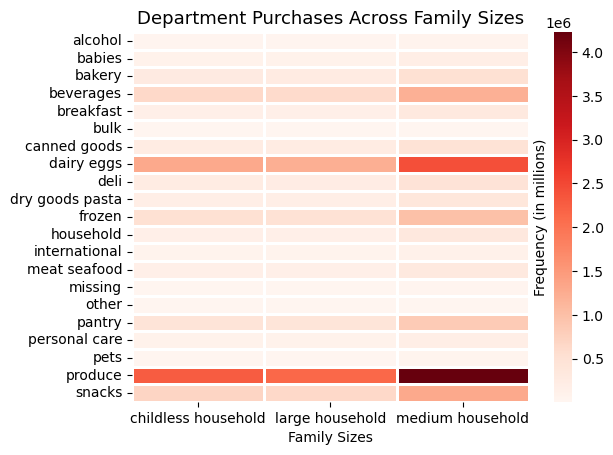

In [101]:
# Creating a heatmap to show relationship between age groups and department purchases.

heatmap_family_dept = sns.heatmap(family_department_crosstab, cmap='Reds',linecolor='white',linewidths=1)

plt.title('Department Purchases Across Family Sizes', fontsize = 13)
heatmap_family_dept.yaxis.set_label_position("right")
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Family Sizes', fontsize = 10)

In [106]:
# Export heatmap department/family sizes chart. bbox_inches = 'tight' prevents the chart from being cut off.

heatmap_family_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_family_dept.png'), bbox_inches='tight')

#### Overall, more products were bought in the South than other regions. Also, products from produce, dairy/eggs, beverages and a few other deparment categories were bought more than others across the board. However, more products sold overall when purchased by young and middle aged adults. Middle incomes bought more goods overall, and families with 1 or 2 children bought more products than those with no children or 3 children.

### 4. Additional Charts to Answer Project Brief Questions

#### a) Habits of Customer Profiles by Price of Orders & Order Frequency

In [23]:
# Compare puchases by families of different sizes across departments.

income_price_crosstab = pd.crosstab(df_norm_act['income_level'], df_norm_act['price_label'], dropna = False)
income_price_crosstab

price_label,High-range product,Low-range product,Mid-range product
income_level,,,
high-income,111836,2304402,5325023
low-income,71574,2771538,4898236
middle-income,214543,4598900,10668512


Text(0.5, 0, 'Income Levels')

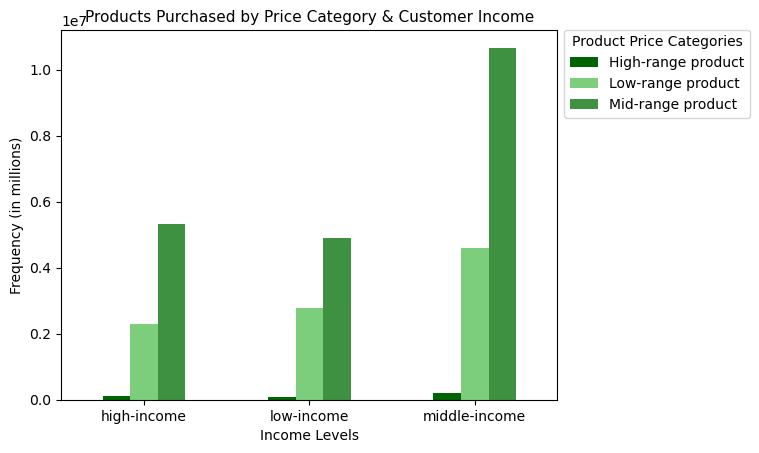

In [24]:
# Create a stacked bar chart for income level and price range label.
bar_income_price = income_price_crosstab.plot(kind = 'bar', rot = 0, color = ['darkgreen', '#7CCD7C', '#3D9140'])
bar_income_price.legend(title = 'Product Price Categories', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Products Purchased by Price Category & Customer Income', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Income Levels', fontsize = 10)

In [25]:
# Export bar income/product price bar chart.

bar_income_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_price.png'), bbox_inches='tight')


Text(0.5, 23.52222222222222, 'Product Price Categories')

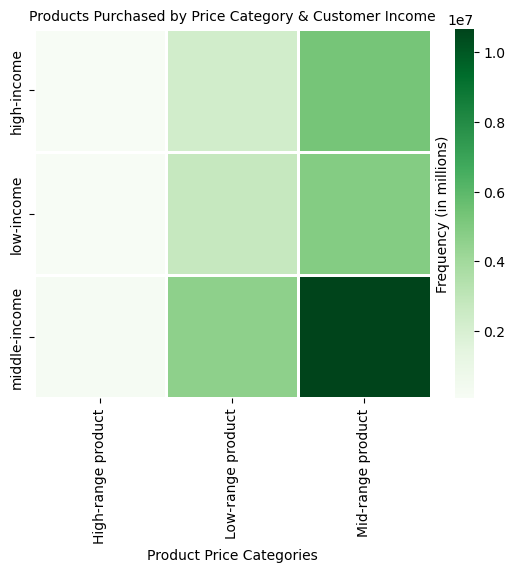

In [29]:
# Creating a heatmap to show relationship between income level and price range of products purchased.

heatmap_income_price = sns.heatmap(income_price_crosstab, cmap='Greens',linecolor='white',linewidths=1)

plt.title('Products Purchased by Price Category & Customer Income', fontsize = 10)
plt.ylabel('Frequency (in millions)', fontsize = 10)
heatmap_income_price.yaxis.set_label_position("right") 
plt.xlabel('Product Price Categories', fontsize = 10)

In [30]:
# Export bar income/product price heat map.

heatmap_income_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_income_price.png'), bbox_inches='tight')


In [31]:
# Compare frequency of orders by customers of different income levels.

income_frequency_crosstab = pd.crosstab(df_norm_act['income_level'], df_norm_act['order_frequency_flag'], dropna = False)
income_frequency_crosstab

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_level,,,
high-income,5331414,700349,1709498
low-income,5222592,790261,1728495
middle-income,10650470,1404365,3427120


Text(0.5, 0, 'Income Levels')

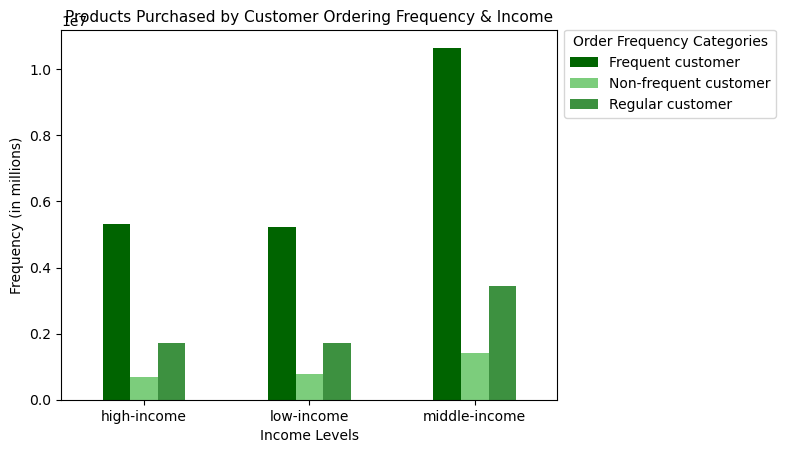

In [34]:
# Create a stacked bar chart for income level and order frequency flag.
bar_income_frequency = income_frequency_crosstab.plot(kind = 'bar', rot = 0, color = ['darkgreen', '#7CCD7C', '#3D9140'])
bar_income_frequency.legend(title = 'Order Frequency Categories', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Products Purchased by Customer Ordering Frequency & Income', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Income Levels', fontsize = 10)

In [35]:
# Export bar income/order frequency bar chart

bar_income_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'), bbox_inches='tight')

Text(0.5, 23.52222222222222, 'Order Frequency Categories')

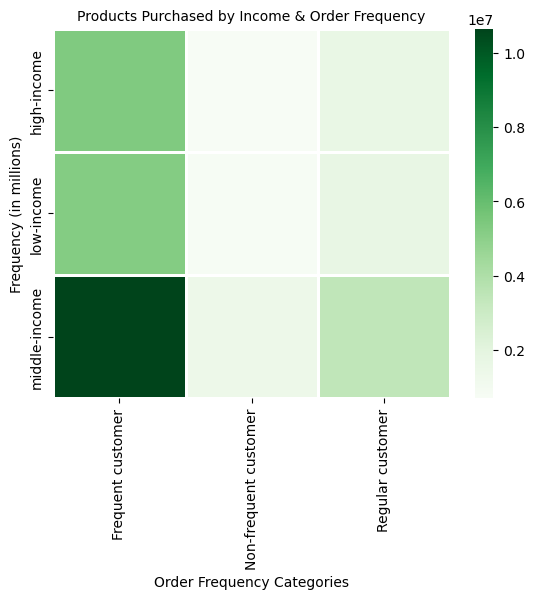

In [32]:
# Creating a heatmap to show relationship between income level and order frequency of customers of products purchased.

heatmap_income_frequency = sns.heatmap(income_frequency_crosstab, cmap='Greens',linecolor='white',linewidths=1)

plt.title('Products Purchased by Income & Order Frequency', fontsize = 10)
plt.ylabel('Frequency (in millions)', fontsize = 10)
heatmap_income_price.yaxis.set_label_position("right") 
plt.xlabel('Order Frequency Categories', fontsize = 10)

In [33]:
# Export bar income/order frequency heatmap.

heatmap_income_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_income_frequency.png'), bbox_inches='tight')

In [24]:
# Compare product price categories purchased by customers of different age groups.

age_price_crosstab = pd.crosstab(df_norm_act['age_group'], df_norm_act['price_label'], dropna = False)
age_price_crosstab 

price_label,High-range product,Low-range product,Mid-range product
age_group,,,
middle-aged,125144,3038382,6561424
older adult,92632,2235480,4833763
oldest old,44300,1066564,2301765
young adult,135877,3334414,7194819


Text(0.5, 0, 'Age Groups')

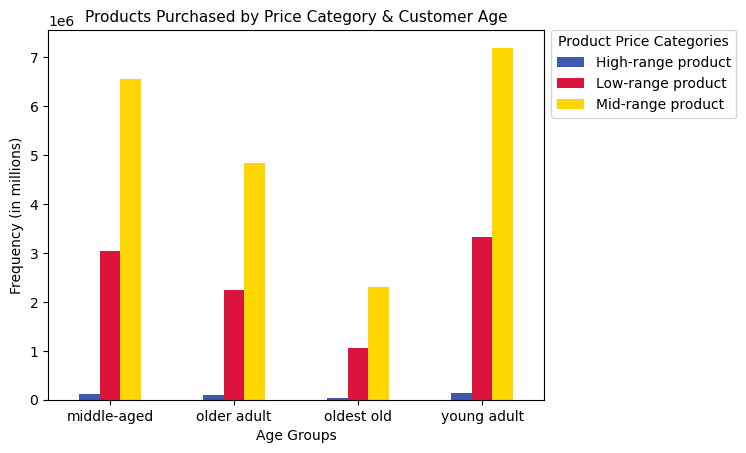

In [25]:
# Create a stacked bar chart for product price categories purchased by customers of different age groups.
bar_age_price = age_price_crosstab.plot(kind = 'bar', rot = 0, color = ['#3D59AB', '#DC143C', '#FFD700'])
bar_age_price.legend(title = 'Product Price Categories', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Products Purchased by Price Category & Customer Age', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Age Groups', fontsize = 10)

In [26]:
# Export age group/product price category bar chart.

bar_age_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_price.png'), bbox_inches='tight')

In [77]:
# Compare product orders of customers of different ages and order frequency categories.

age_frequency_crosstab = pd.crosstab(df_norm_act['age_group'], df_norm_act['order_frequency_flag'], dropna = False)
age_frequency_crosstab

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
middle-aged,6652947,917618,2154385
older adult,4908527,676459,1576889
oldest old,2343691,314079,754859
young adult,7299311,986819,2378980


Text(0.5, 0, 'Age Groups')

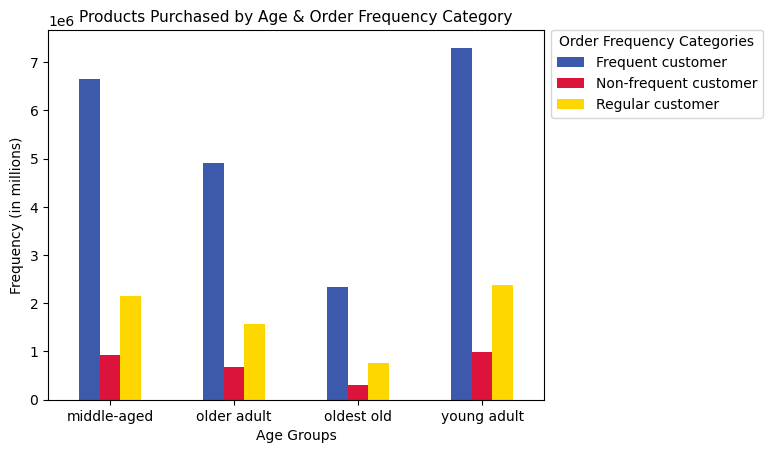

In [95]:
# Create a stacked bar chart for products purchased by customers of different age groups and order frequency categories.
bar_age_frequency = age_frequency_crosstab.plot(kind = 'bar', rot = 0, color = ['#3D59AB', '#DC143C', '#FFD700'])
bar_age_frequency.legend(title = 'Order Frequency Categories', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Products Purchased by Age & Order Frequency Category', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Age Groups', fontsize = 10)

In [96]:
# Export age group/order frequency bar chart.

bar_age_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_frequency.png'), bbox_inches='tight')

Text(0.5, 23.52222222222222, 'Order Frequency Categories')

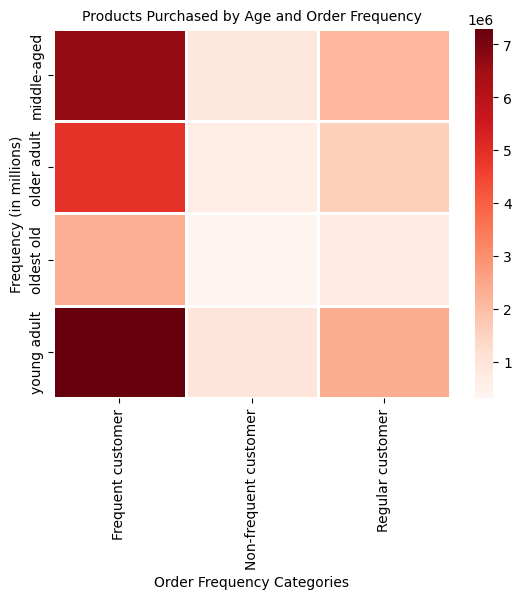

In [105]:
# Creating a heatmap to show relationship of products purchased between age and customer order frequency category.

heatmap_age_frequency = sns.heatmap(age_frequency_crosstab, cmap='Reds',linecolor='white',linewidths=1)

plt.title('Products Purchased by Age and Order Frequency', fontsize = 10)
plt.ylabel('Frequency (in millions)', fontsize = 10)
heatmap_income_price.yaxis.set_label_position("right") 
plt.xlabel('Order Frequency Categories', fontsize = 10)

In [106]:
# Export age group/order frequency bar chart.

heatmap_age_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_age_frequency.png'), bbox_inches='tight')

In [87]:
# Compare orders of products of different price ranges with the family size of those customers.

family_price_crosstab = pd.crosstab(df_ind_adults['family_size'], df_ind_adults['price_label'], dropna = False)
family_price_crosstab

price_label,High-range product,Low-range product,Mid-range product
family_size,,,
childless household,97455,2419238,5222988
large household,94264,2276476,4913307
medium household,187237,4517319,9755108


Text(0.5, 0, 'Family Size')

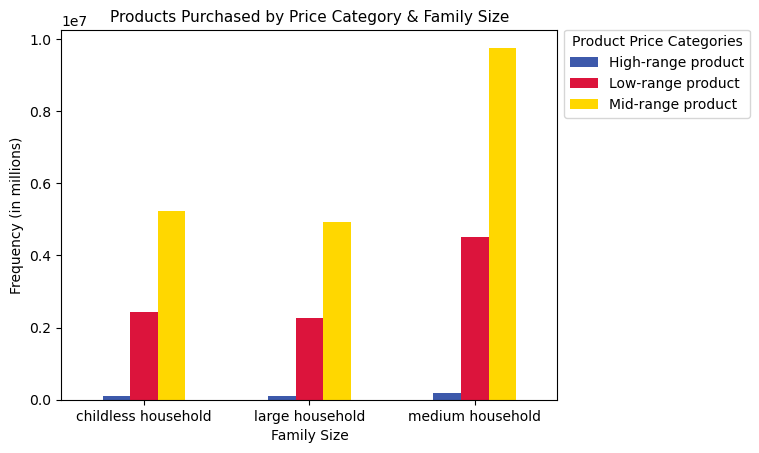

In [123]:
# Create a stacked bar chart for products of different prices ranges purchased by customers with different family sizes.
bar_family_price = family_price_crosstab.plot(kind = 'bar', rot = 0, color = ['#3D59AB', '#DC143C', '#FFD700'])
bar_family_price.legend(title = 'Product Price Categories', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Products Purchased by Price Category & Family Size', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Family Size', fontsize = 10)

In [124]:
# Export fammily size/product price range bar chart.

bar_family_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_price.png'), bbox_inches='tight')

In [94]:
# Compare orders of products from customers of different ordering frequency with the family size of those customers.

family_frequency_crosstab = pd.crosstab(df_ind_adults['family_size'], df_ind_adults['order_frequency_flag'], dropna = False)
family_frequency_crosstab

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_size,,,
childless household,5285137,716506,1738038
large household,4973709,676286,1634052
medium household,9915116,1363537,3181011


Text(0.5, 0, 'Family Size')

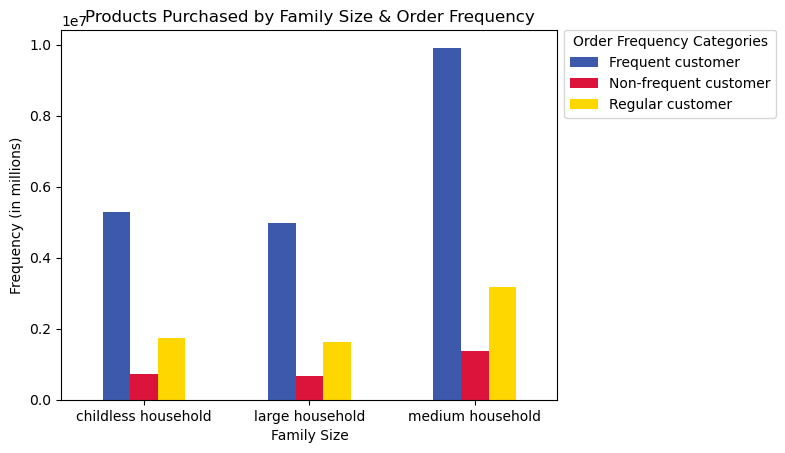

In [100]:
# Create a stacked bar chart for products purchases from customers of different order freqquencies and different family sizes.
bar_family_frequency = family_frequency_crosstab.plot(kind = 'bar', rot = 0, color = ['#3D59AB', '#DC143C', '#FFD700'])
bar_family_frequency.legend(title = 'Order Frequency Categories', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Products Purchased by Family Size & Order Frequency', fontsize = 12)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Family Size', fontsize = 10)

In [101]:
# Export fammily size/order frequency bar chart.

bar_family_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_frequency .png'), bbox_inches='tight')

Text(0.5, 23.52222222222222, 'Order Frequency Categories')

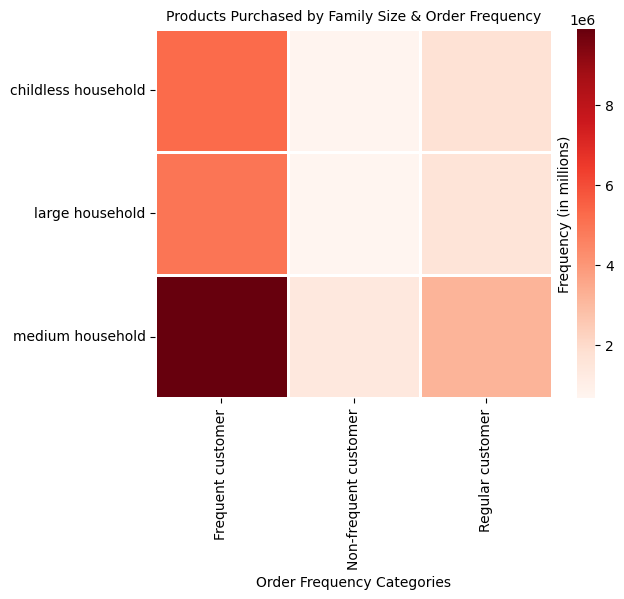

In [125]:
# Creating a heatmap to show relationship of products purchased between family size and customer order frequency categories.

heatmap_family_frequency = sns.heatmap(family_frequency_crosstab,cmap='Reds',linecolor='white',linewidths=1)

plt.title('Products Purchased by Family Size & Order Frequency', fontsize = 10)
plt.ylabel('Frequency (in millions)', fontsize = 10)
heatmap_family_frequency.yaxis.set_label_position("right") 
plt.xlabel('Order Frequency Categories', fontsize = 10)

In [126]:
# Export fammily size/order frequency heatmap.

heatmap_family_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_family_frequency .png'), bbox_inches='tight')

#### b) Brand Loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

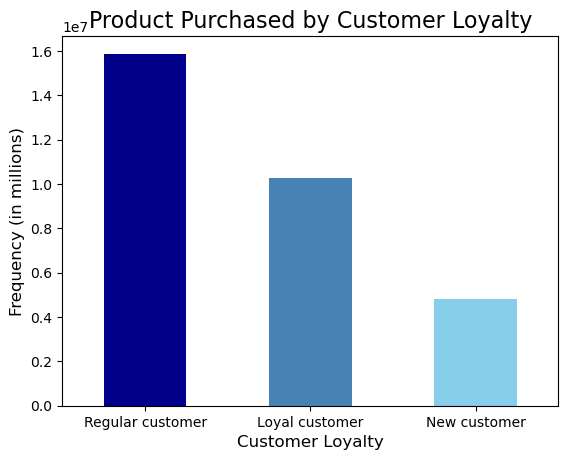

In [41]:
bar_loyalty = df_norm_act['loyalty_flag'].value_counts().plot.bar(color = ['darkblue', 'steelblue', 'skyblue'])

plt.title('Product Purchased by Customer Loyalty', fontsize = 16)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Customer Loyalty', fontsize = 12)
plt.xticks(rotation = 0)

In [42]:
# Export customer loyalty distribution bar chart.

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'), bbox_inches='tight')

#### The above chart suggests that more products are bought by regular customers than by new customers or by the most loyal customers. Customer loyalty is ranked by the number of orders placed by each customer.

In [35]:
# Compare orders of products from customer loyalty categories and product price category.

loyalty_price_crosstab = pd.crosstab(df_norm_act['loyalty_flag'], df_norm_act['price_label'], dropna = False)
loyalty_price_crosstab

price_label,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


Text(0.5, 23.52222222222222, 'Product Price Categories')

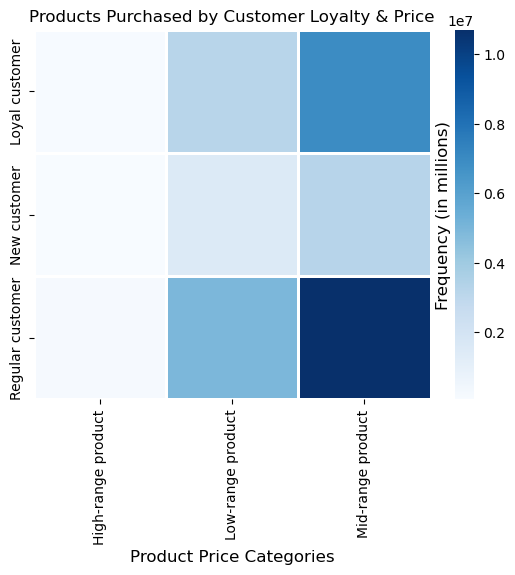

In [45]:
# Creating a heatmap to show relationship of products purchased between loyalty category and product price.

heatmap_loyalty_price = sns.heatmap(loyalty_price_crosstab, cmap='Blues',linecolor='white',linewidths=1)

plt.title('Products Purchased by Customer Loyalty & Price', fontsize = 12)
plt.ylabel('Frequency (in millions)', fontsize = 12)
heatmap_loyalty_price.yaxis.set_label_position("right") 
plt.xlabel('Product Price Categories', fontsize = 12)

In [46]:
# Export customer loyalty product price heatmap.

heatmap_loyalty_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_loyalty_price.png'), bbox_inches='tight')

In [47]:
# Compare orders of products from customer loyalty categories and customer order frequency category.

loyalty_frequency_crosstab = pd.crosstab(df_norm_act['loyalty_flag'], df_norm_act['order_frequency_flag'], dropna = False)
loyalty_frequency_crosstab

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1293294,1983500,1526901
Regular customer,9631222,911475,5334079


Text(0.5, 23.52222222222222, 'Order Frequency Categories')

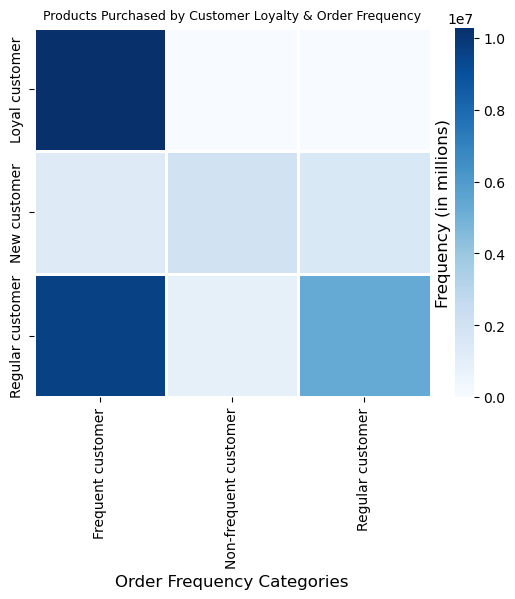

In [50]:
# Creating a heatmap to show relationship of products purchased between customer loyalty and customer order frequency.

heatmap_loyalty_frequency = sns.heatmap(loyalty_frequency_crosstab, cmap='Blues',linecolor='white',linewidths=1)

plt.title('Products Purchased by Customer Loyalty & Order Frequency', fontsize = 9)
plt.ylabel('Frequency (in millions)', fontsize = 12)
heatmap_loyalty_frequency.yaxis.set_label_position("right") 
plt.xlabel('Order Frequency Categories', fontsize = 12)

In [52]:
# Export customer loyalty and order frequency heatmap.

heatmap_loyalty_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_loyalty_price.png'), bbox_inches='tight')

In [54]:
# Compare orders of products from customer loyalty categories and grocery store department.

loyalty_department_crosstab = pd.crosstab(df_norm_act['department'], df_norm_act['loyalty_flag'], dropna = False)
loyalty_department_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


Text(0.5, 23.52222222222222, 'Order Frequency Categories')

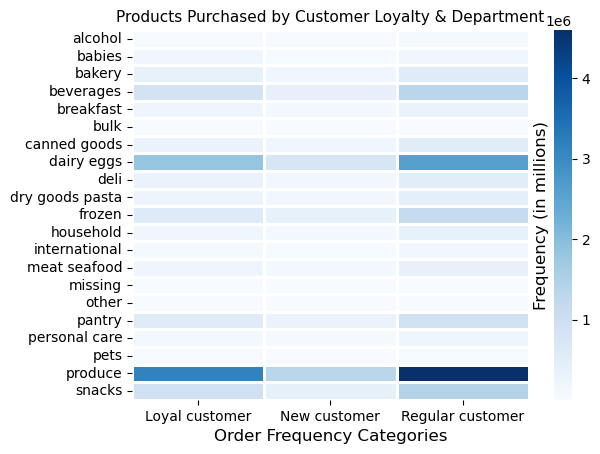

In [57]:
# Creating a heatmap to show relationship of products purchased between customer loyalty and department.

heatmap_loyalty_department = sns.heatmap(loyalty_department_crosstab, cmap='Blues',linecolor='white',linewidths=1)

plt.title('Products Purchased by Customer Loyalty & Department', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 12)
heatmap_loyalty_department.yaxis.set_label_position("right") 
plt.xlabel('Order Frequency Categories', fontsize = 12)

In [58]:
# Export customer loyalty and department heatmap.

heatmap_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_loyalty_department.png'), bbox_inches='tight')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

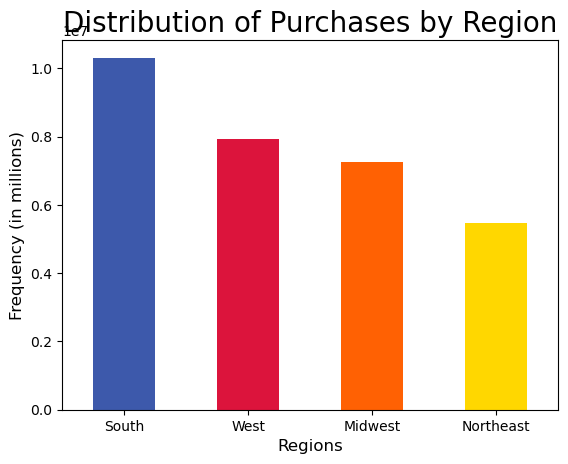

In [16]:
# Purchases by regions alone. There is a need for this chart, and it was not previously created.

# Creating a bar chart for product purchases by region.

bar_region = df_norm_act['region'].value_counts().plot.bar(color=['#3D59AB', '#DC143C', '#FF6103', '#FFD700'])

plt.title('Distribution of Purchases by Region', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions', fontsize = 12)
plt.xticks(rotation = 0)

In [17]:
# Export regional bar chart.

bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'), bbox_inches='tight')

In [18]:
# Compare orders of products from customer loyalty categories and grocery store department.

region_department_crosstab = pd.crosstab(df_norm_act['department'], df_norm_act['region'], dropna = False)
region_department_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


Text(0.5, 23.52222222222222, 'Regions')

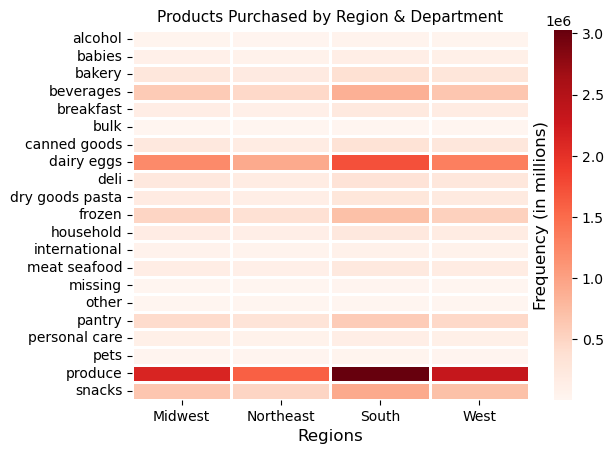

In [19]:
# Creating a heatmap to show relationship of products purchased between region and departments.

heatmap_region_department = sns.heatmap(region_department_crosstab, cmap='Reds',linecolor='white',linewidths=1)

plt.title('Products Purchased by Region & Department', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 12)
heatmap_region_department.yaxis.set_label_position("right") 
plt.xlabel('Regions', fontsize = 12)

In [20]:
# Export region and department heatmap.

heatmap_region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_region_department.png'), bbox_inches='tight')